# Movie Genre Just by Poster


## Importing necessary libraries

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from tqdm import tqdm

Using TensorFlow backend.


## Reading the dataset

I used only 2000 images to train this model here beacuse of the limitation og Kaggle's Computation.
You could train for all images in your System or on Cloud.

In [2]:
data = pd.read_csv('../input/movie-classifier/Multi_Label_dataset/train.csv')
data = data.head(2000)
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


First we need to find how many different Genre are present in Dataset

In [3]:
Data_columns = data.columns
Data_columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [4]:
train_image = []
for i in tqdm(range(data.shape[0])):
    img = image.load_img('../input/movie-classifier/Multi_Label_dataset/Images/'+
                         data['Id'][i]+
                         '.jpg',
                         target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
    
X = np.array(train_image)

100%|██████████| 2000/2000 [00:51<00:00, 39.16it/s]


In [5]:
X.shape

(2000, 400, 400, 3)

Split the Output Label

In [6]:
y = np.array(data.drop(['Id', 'Genre'],axis=1))
y.shape

(2000, 25)

## Train & Test Split

I used 0.1 test_size here, so that model is trained over more values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25, test_size=0.1)


## Model Defination

Whole model structure which I used is build here:

In [8]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 93, 93, 32)       

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

So, now let's train the Model
I trained for 10 Epoches and with Batch Size of 50 at a time

In [11]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=50)

Train on 1800 samples, validate on 200 samples
Epoch 1/10
1800/1800 [==============================] - 306s 170ms/step - loss: 0.4736 - accuracy: 0.7794 - val_loss: 0.3694 - val_accuracy: 0.9038
Epoch 2/10
1800/1800 [==============================] - 303s 169ms/step - loss: 0.3324 - accuracy: 0.8798 - val_loss: 0.2680 - val_accuracy: 0.9038
Epoch 3/10
1800/1800 [==============================] - 302s 168ms/step - loss: 0.2956 - accuracy: 0.8941 - val_loss: 0.2711 - val_accuracy: 0.9038
Epoch 4/10
1800/1800 [==============================] - 302s 168ms/step - loss: 0.2808 - accuracy: 0.8999 - val_loss: 0.2479 - val_accuracy: 0.9038
Epoch 5/10
1800/1800 [==============================] - 302s 168ms/step - loss: 0.2722 - accuracy: 0.9024 - val_loss: 0.2469 - val_accuracy: 0.9042
Epoch 6/10
1800/1800 [==============================] - 302s 168ms/step - loss: 0.2678 - accuracy: 0.9033 - val_loss: 0.2433 - val_accuracy: 0.9042
Epoch 7/10
1800/1800 [==============================] - 302s 168m

## Let's test for some Images

Drama
Comedy
Crime
Romance
Action


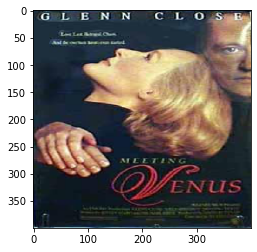

In [12]:
img = image.load_img('../input/movie-classifier/Multi_Label_dataset/Images/tt0102428.jpg',
                     target_size=(400,400,3))
plt.imshow(img)

img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,400,400,3)

classes = data.columns[2:]
y_pred = model.predict(img)

genre =np.argsort(y_pred[0])[:-6:-1]
for i in range(5):
    print(classes[genre[i]])

In [13]:
model.save("my_image_model.h5")